## Instructions
- Import the necessary libraries.
- Load the customer_value_analysis.csv into the variable customer_df.
- First look at its main features (head, shape, info).
- Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
- Change the type of effective_to_date column to DateTime format.
- Check NaN values per column.
- Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
- Drop any ID column.
- Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
- Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.
- Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).
- Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
- According to the previous histogram plots, do you think that you will have to apply any transformation?
- Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [63]:
# Checking shape

customer_df.shape

(9134, 24)

In [64]:
# Checking info

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [65]:
# Renaming columns

new_cols = []

for col in customer_df.columns:
    new_cols.append(col.lower().replace(' ', '_'))

customer_df.columns = new_cols
    
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [66]:
# Changing effective_to_date to date format

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [67]:
# Checking for nulls

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [68]:
# Defining function to split dataframe into numerical and categorical df

def df_dtype_split(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Takes a dataframe, splits it into numerical and categorical columns and returns both of them.
    '''
    df_num = df.select_dtypes(include='number')
    df_cat = df.select_dtypes(include='object')
    return df_num, df_cat

customer_df_num, customer_df_cat = df_dtype_split(customer_df)
display(customer_df_num.head())
display(customer_df_cat.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [69]:
# Dropping id column

customer_df_cat.drop(columns='customer', inplace=True)
customer_df_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

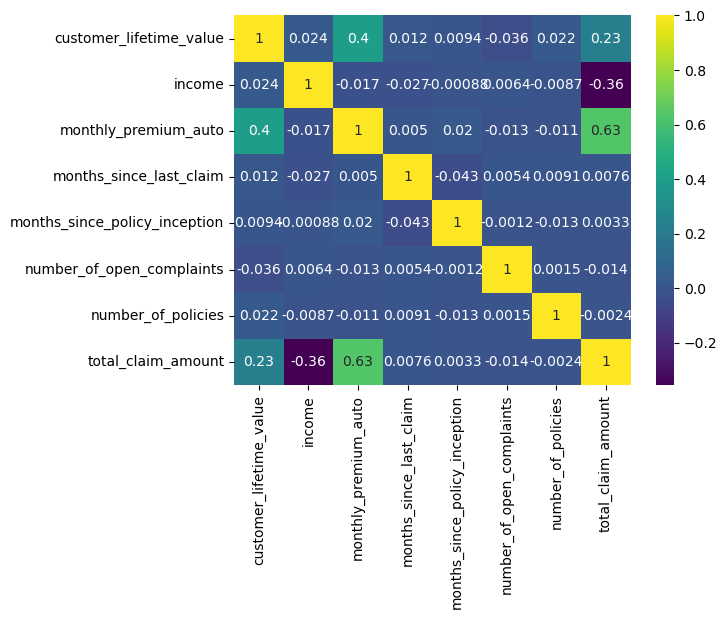

In [70]:
# Correlation matrix for numerical variables

corr_matrix = sns.heatmap(customer_df_num.corr(), cmap='viridis', annot=True)

In [71]:
# Defining function to split numerical df into discrete/continuous

def df_numerical_split(df: pd.DataFrame, threshold: int=36) -> pd.DataFrame:
    '''
    Takes a dataframe with numerical columns, and splits it into discrete and continuous based on the number (threshold)
    of unique values of the columns.
    Returns discrete and continuous dataframes.
    '''
    disc = []
    cont = []
    for col in df.columns:
        if df[col].nunique() > threshold:
            cont.append(col)
        else:
            disc.append(col)
    continuous_df = df[cont]
    discrete_df = df[disc]
    return continuous_df, discrete_df

continuous_df, discrete_df = df_numerical_split(customer_df_num)

display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


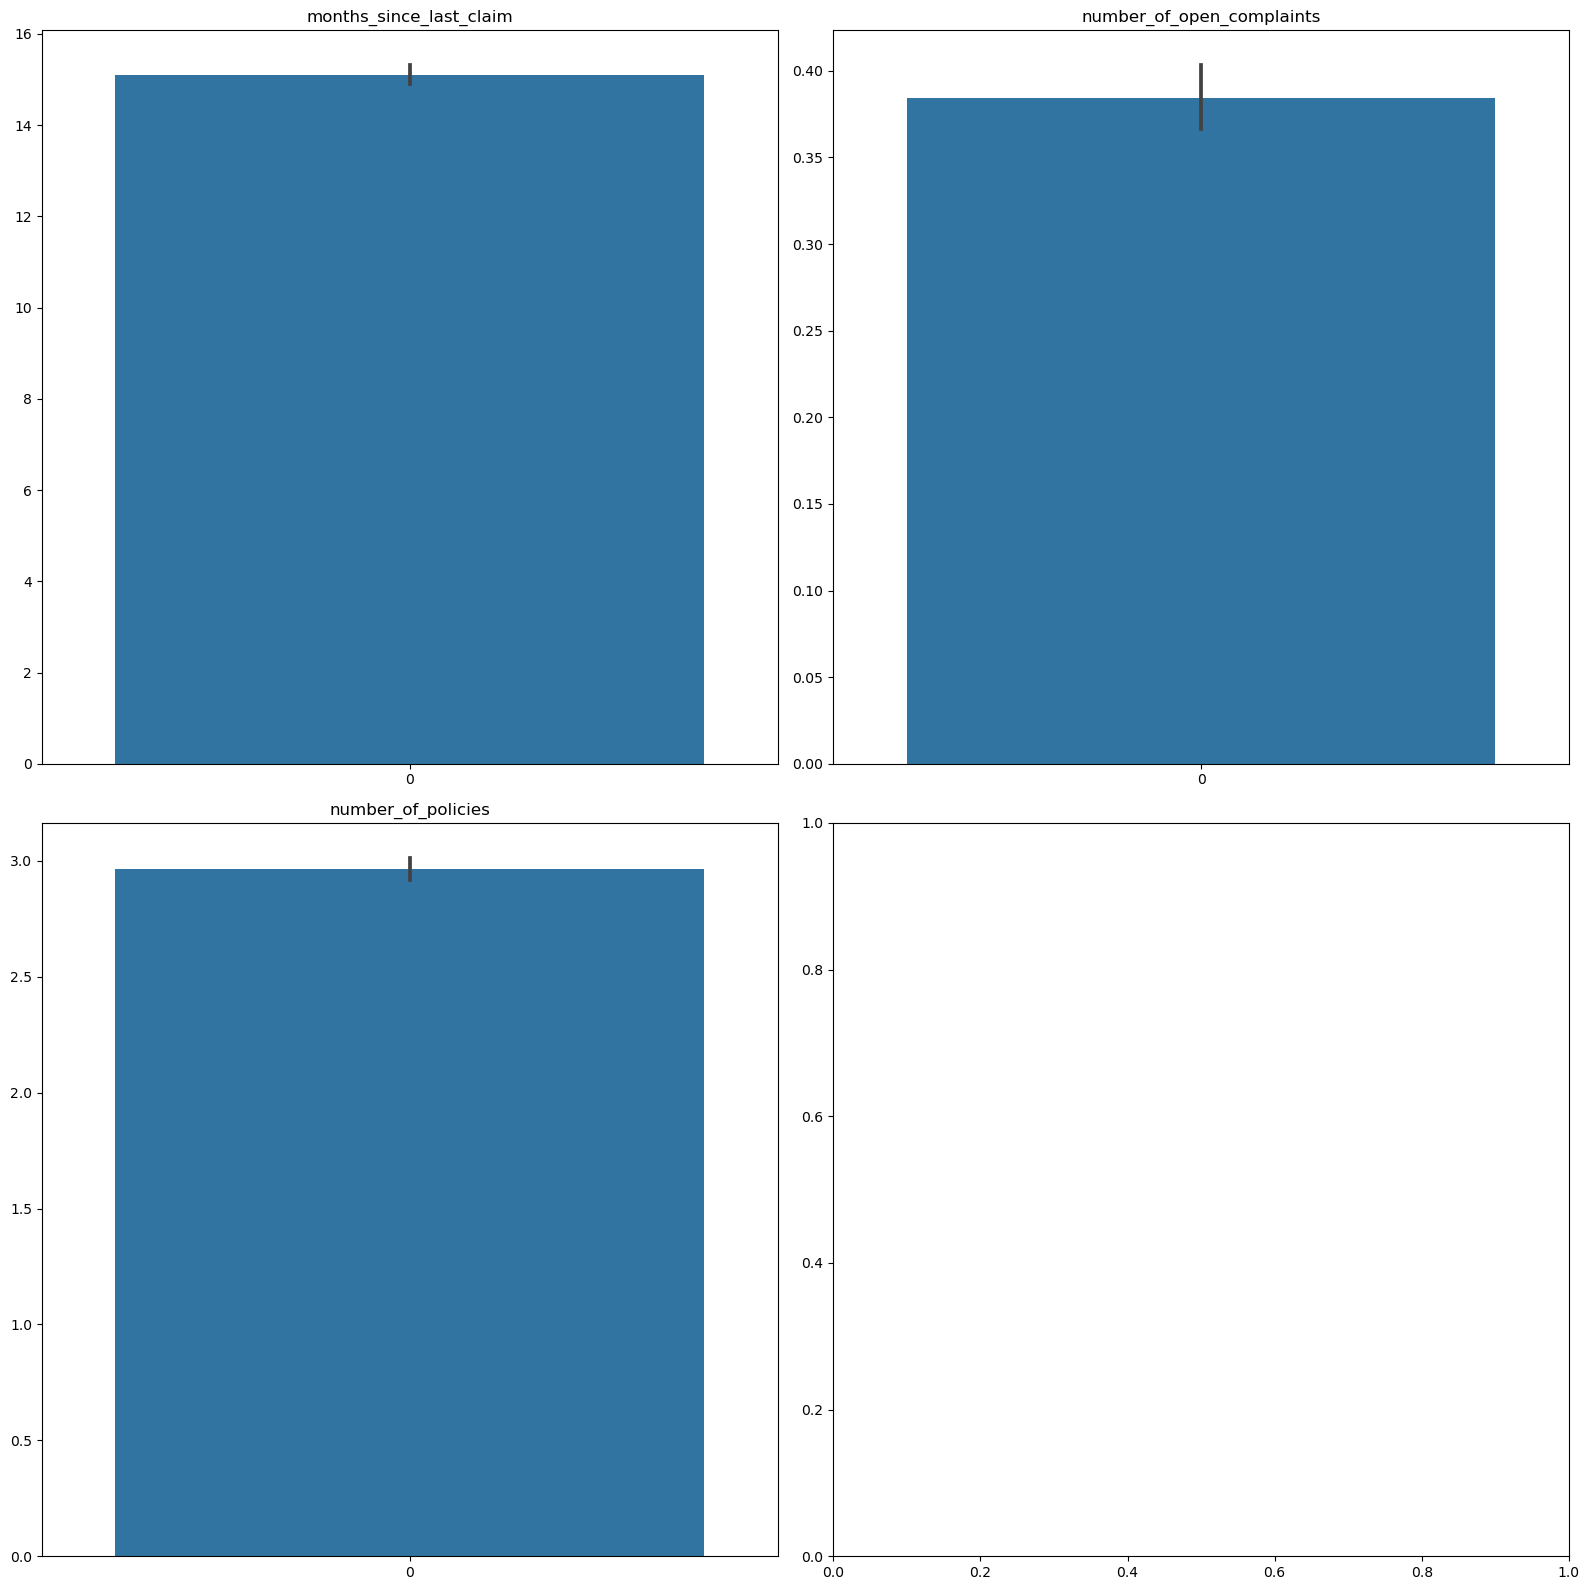

In [74]:
# Function to create a barplot for all cols in the discrete df

def barplot_discrete(df: pd.DataFrame=discrete_df):
    '''
    Takes a dataframe and creates a barplot for each column.
    '''
    num_cols = df.shape[1]
    num_rows = num_cols // 2 + 1
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.barplot(df[col], ax=axes[i])
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()
        
barplot_discrete(discrete_df)

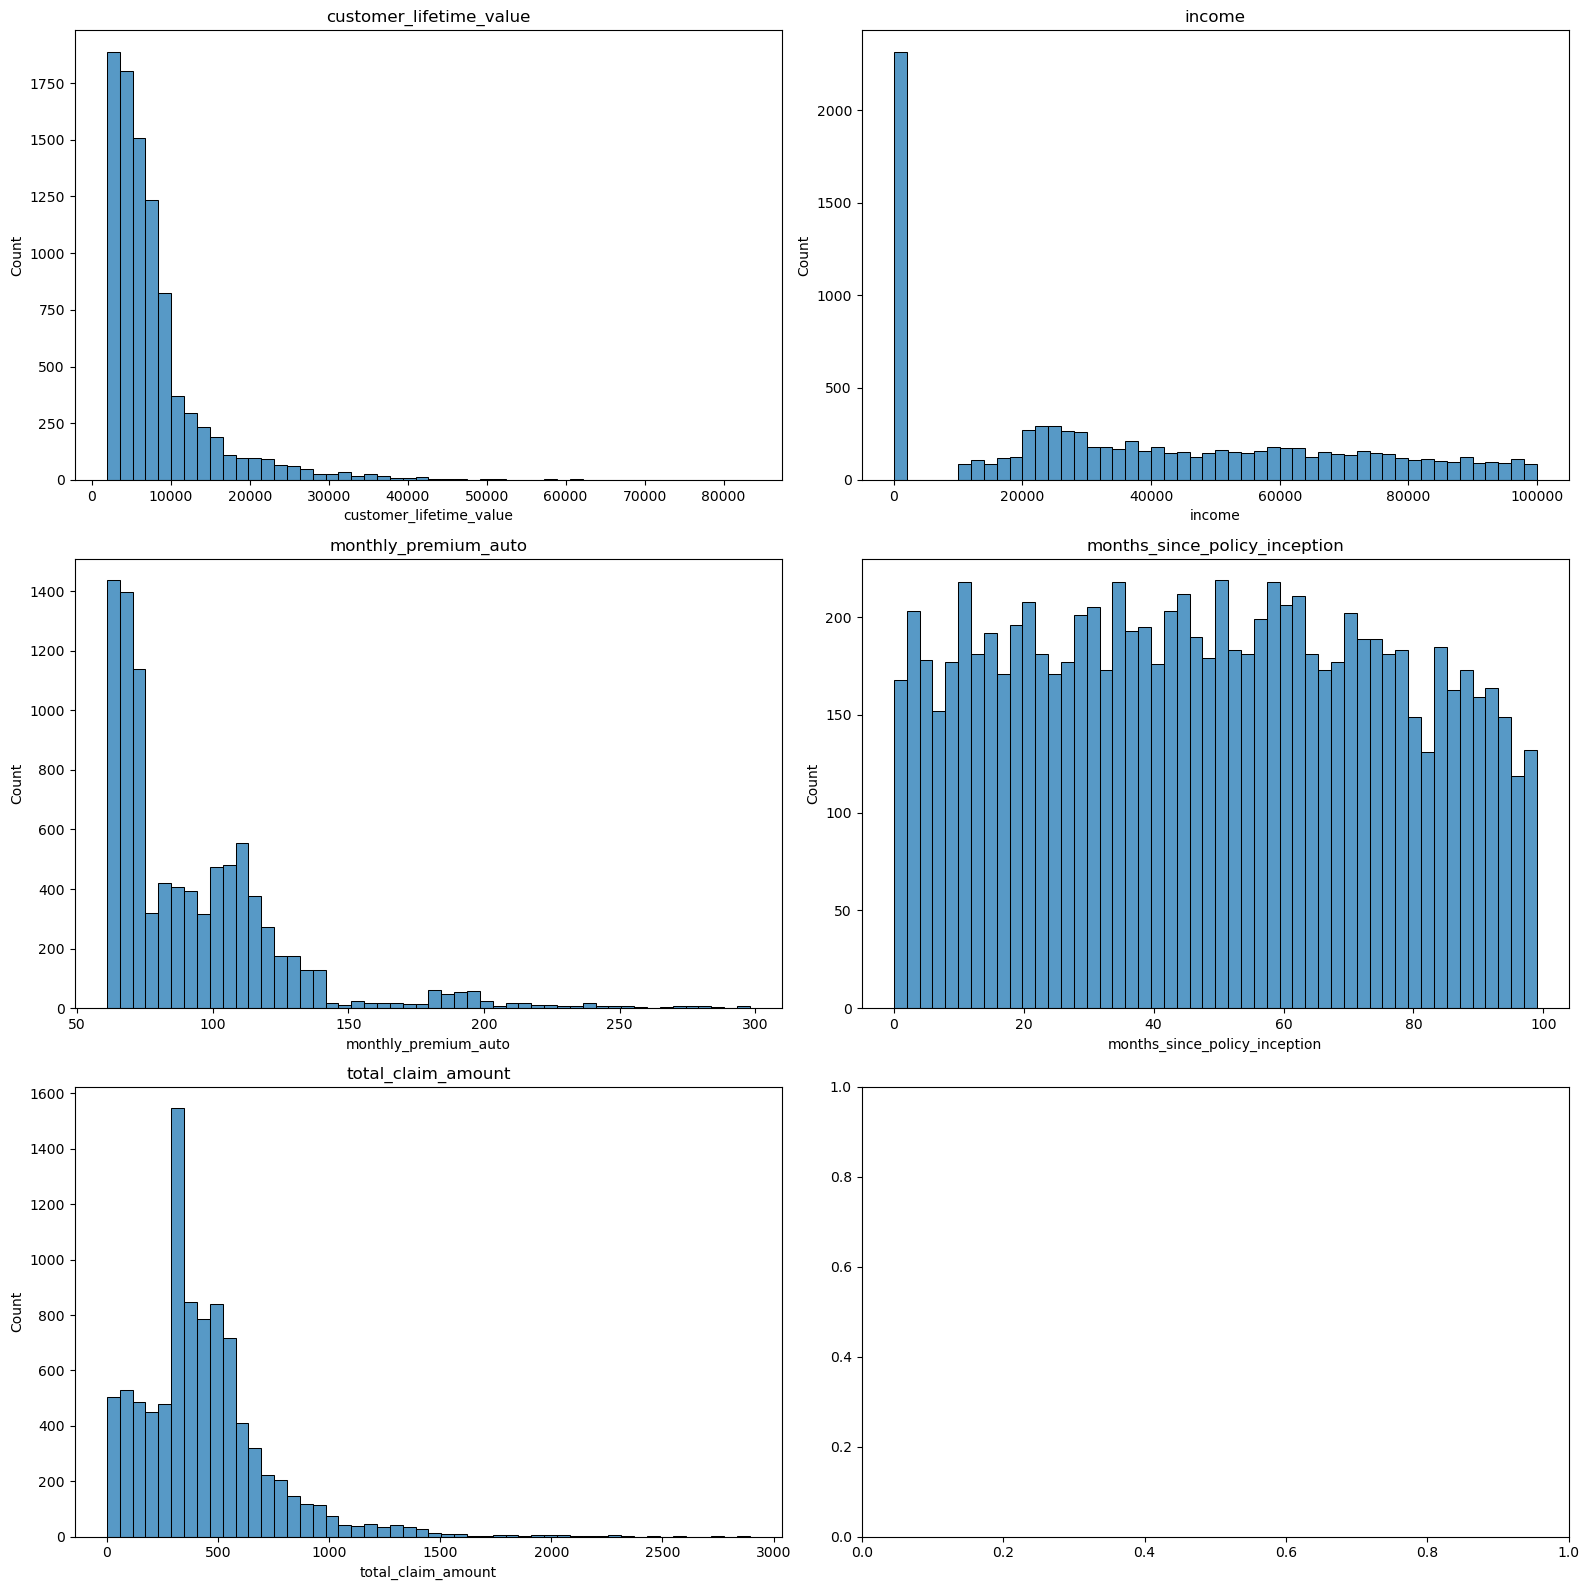

In [75]:
# Function to create a histogram for all cols in the continuous df

def hist_continuous(df: pd.DataFrame=continuous_df):
    '''
    Takes a dataframe and creates a histogram for each column.
    '''
    num_cols = df.shape[1]
    num_rows = num_cols // 2 + 1
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i], bins=50)
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()
        
hist_continuous(continuous_df)

According to the histograms above:
- Income and months since policy inception look pretty symmetrical, aside from the large number of zeros in income
- The distributions of the rest of the columns look positively skewed and will most likely warrant a transformation

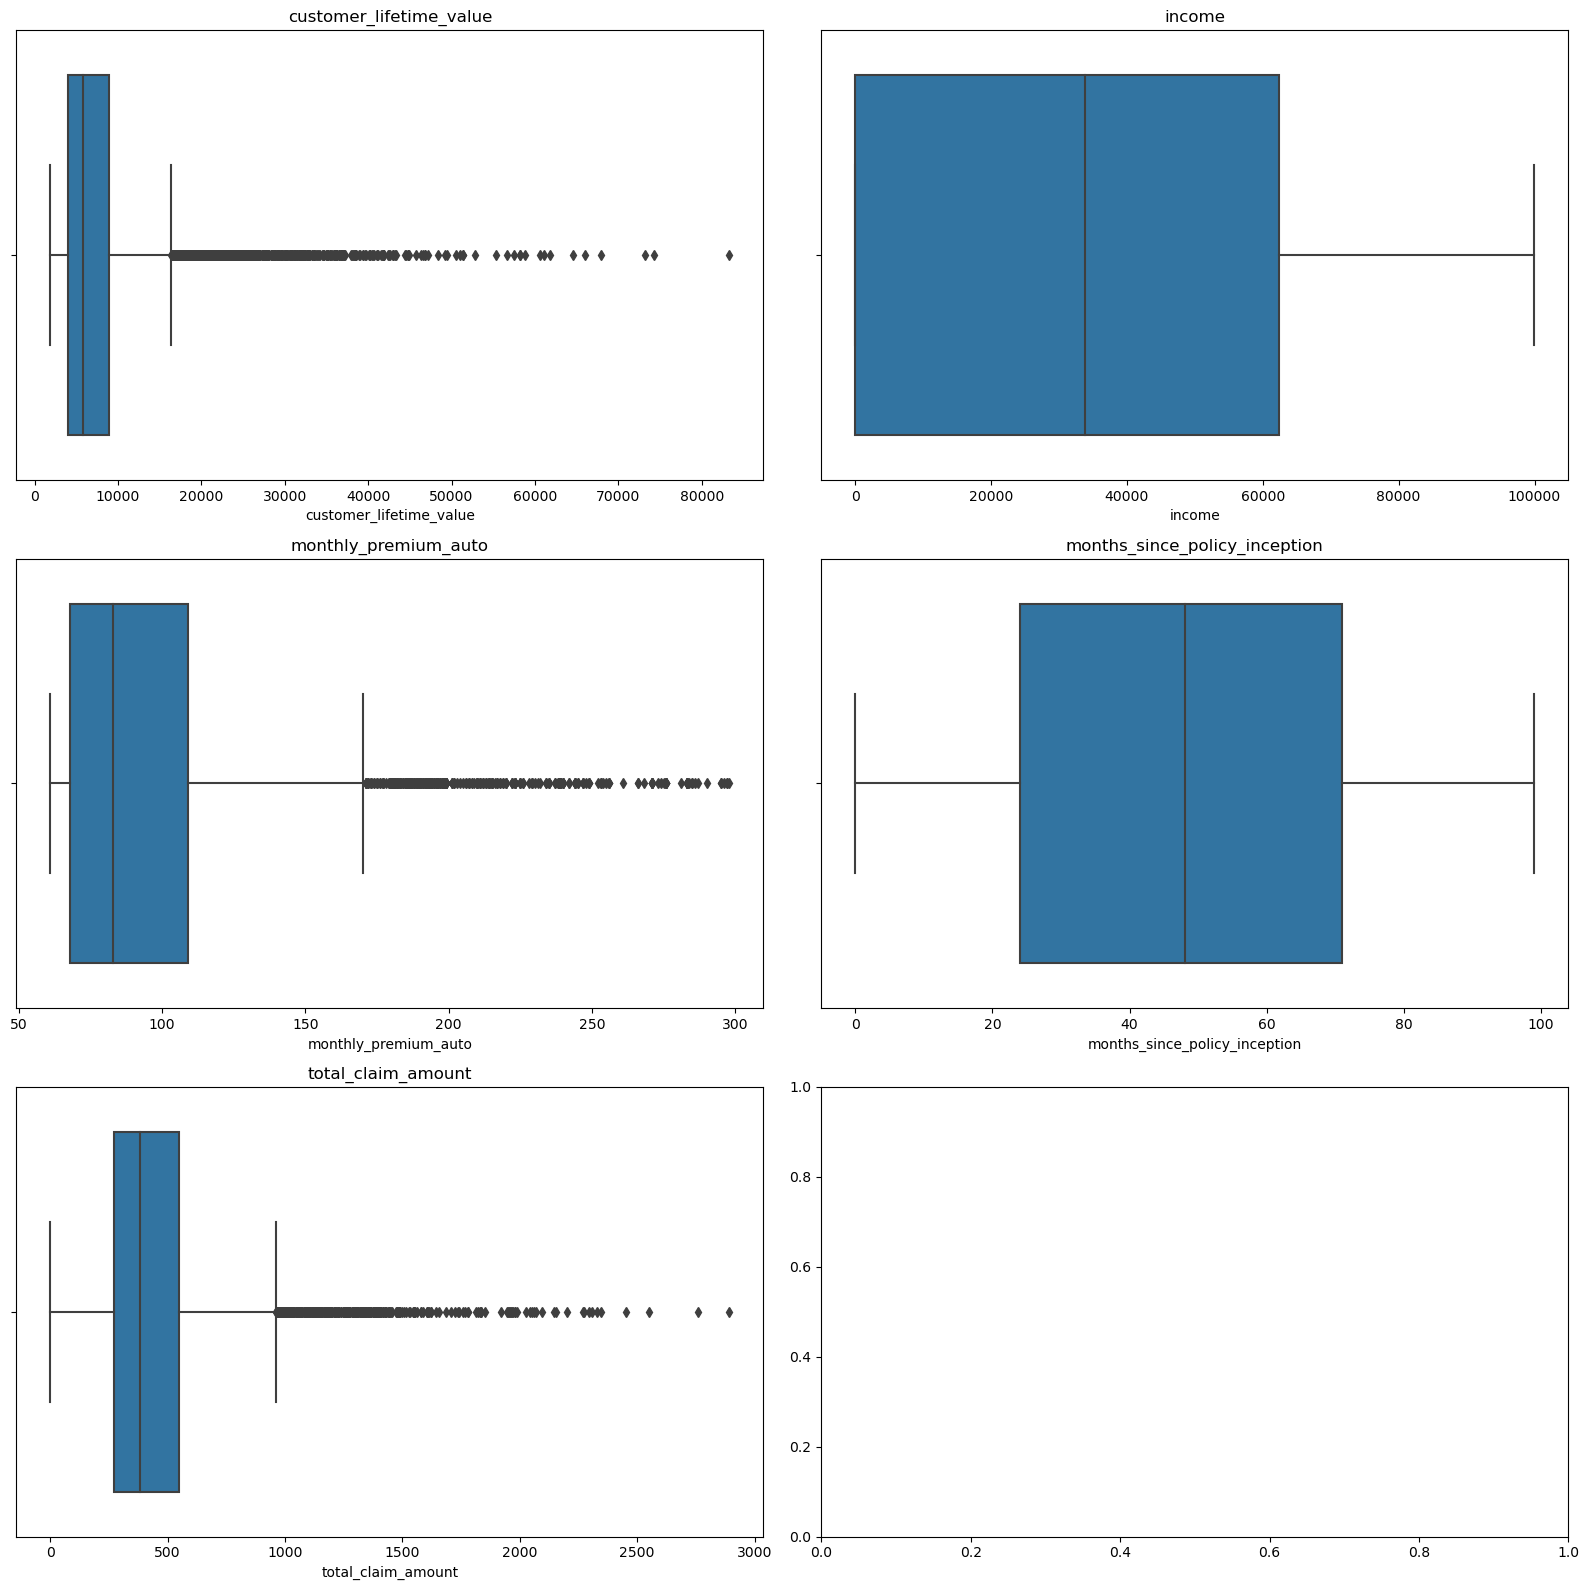

In [79]:
# Function to create a boxplot for each col in the continuous df and visualize outliers

def boxplot_continuous(df: pd.DataFrame=continuous_df):
    '''
    Takes a dataframe and creates a boxplot for each column.
    '''
    num_cols = df.shape[1]
    num_rows = num_cols // 2 + 1
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()
        
boxplot_continuous(continuous_df)

Customer lifetime value and total claim amount seem to have a handful of outliers at the very end of the distribution, the rest of the values outside of the whiskers' default values are part of the column distribution, indicated by how dense and overlapped they are (not scarce and isolated). Another approach we could take is to create a pairplot to identify values that fall apart from the rest of the scatterplots when plotting two variables together.